<a href="https://colab.research.google.com/github/itonsoup/Google-Colab/blob/main/%D0%93%D0%BB%D0%B0%D0%B2%D0%B0_4_%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Набор данных

**Оценка стоимости  и типа трансмиссии по данным продаж автомобилей на вторичном рынке Молдавии**

Набор данных представляет собой статистику параметров автомобилей на вторичном рынке в Молдавии.

Набор включает ряд категориальных и численных значений, составляющих одну запись (строку). Число записей можно найти как число строк.

Каждый столбец в записи — это отдельный параметр.

Среди указанных параметров приведены целевой для задачи предсказания (регрессии) - цена автомобиля.

 Также среди параметров есть целевой для задачи классификации - тип трансмиссии.

 Последняя задача может быть рассмотрена, например, как пример задачи на заполнение пропусков (если продавец не указал соответствующий параметр).

# Import библиотек

In [ ]:
import pandas as pd
from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Загрузка данных на Google Drive

In [ ]:
uploaded = files.upload()

Saving cars_moldova_cat_num.csv to cars_moldova_cat_num.csv


# Считываем файл в DataFrame



метод .read_csv(path,delimiter)

In [ ]:
df = pd.read_csv('/content/cars_moldova_cat_num.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),km_year
0,40,92,2011,4,195000.0,1800.0,2,1,7750.0,17727.272727
1,32,62,2014,11,135000.0,1500.0,0,0,8550.0,16875.000000
2,32,71,2012,11,110000.0,1500.0,0,0,6550.0,11000.000000
3,28,23,2006,11,200000.0,1600.0,3,0,4100.0,12500.000000
4,23,124,2000,5,300000.0,2200.0,0,0,3490.0,13636.363636
...,...,...,...,...,...,...,...,...,...,...
32069,42,88,2016,10,88000.0,1800.0,4,1,11500.0,14666.666667
32070,19,53,2002,3,225000.0,1800.0,3,0,4400.0,11250.000000
32071,6,77,2015,11,89000.0,1500.0,0,0,7000.0,12714.285714
32072,22,10,2006,1,370000.0,2000.0,0,0,4000.0,23125.000000


In [ ]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

## Логистическая регрессия

Один из самых простых методов классификации — это логистическая регрессия. По существу, модель логистической регрессии представляет собой аналог линейной регрессии. Однако, если в случае линейной регрессии мы хотели провести линию через наши данные, то в случае логистической регрессии мы стремимся провести линию между двумя классами наших данных. Технически это сводится к тому, что введем функцию принятия решений для результата сопоставления наших данных и построенной линии.
Это можно описать как следующую модель:
$$ \hat{y}_i = \sigma \left(\sum_{j=0}^p w_jX_{ij}\right) \equiv \sigma \left(\sum_{j=1}^p w_jX_{ij}+b\right), $$
где <ul>
<li> $\sigma$ - функция принятия решений - функция активации;
<li> $ \hat{y}_i$ - результат принятия решений - класс экземпляра данных.
    </ul>
Из некоторых статистических выводов известно, что для такой модели необходимо выбрать функцию потерь следующего вида:
$$ L = -\frac{1}{n}\sum_{i=0}^{n-1}{y_i \log{\hat{y}_i}+(1-y_i)\log{(1-\hat{y}_i)}}$$

и следующий вид функции активации:
$$\sigma(z_i) = \frac{1}{1+\exp(-z_i)}, $$
где <ul>
    <li> $z_i = \sum_{j=0}^p w_jX_{ij} = X_iW^T$ ;
     <li> тогда $\hat{y}_i =\sigma(X_iW^T) $.   </ul>
         
прежде чем записать выражение для градиента функции потерь запишем выражение для производной функции активации
$$ \sigma'(z_i) = \frac{\partial \sigma(z_i)}{\partial z_i} = (1-\sigma(z_i))\sigma(z_i) $$
Градиент функции потерь для одного элемента выборки может быть выражен следующим образом:
$$
\nabla_W L_i =
-{
\left(\frac{y_i}{\sigma(X_iW^T)}-\frac{1-y_i}{1-\sigma(X_iW^T)}\right)\sigma'(X_iW^T)\odot X_i
= -\left(y_i - \sigma(X_iW^T) \right)\odot X_i = -\left(y_i - \hat{y}_i\right)\odot X_i
}
$$
Тогда правило обновления весовых параметров может быть записано как
$$ W^t = W^{t-1} - \eta\frac{1}{n}\sum_{i=0}^{n-1}\left(  \hat{y}_i -y_i\right )\odot X_i.$$
Отметим, что данное выражение эквиваленто записанному для логистической регрессии с точностью до коэффициента $2$, поэтому мы учтем данный параметр путем замены $\eta \to \eta/2$.
<br>





рассмотрим графики функции активации сигмоид и ее производной

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z)*(1-sigmoid(z))

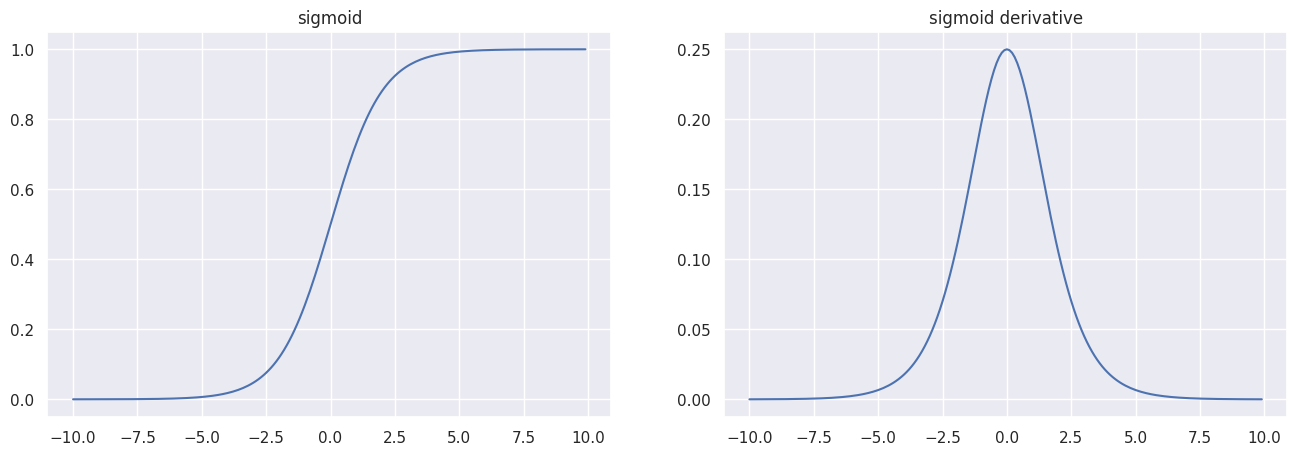

In [ ]:
z = np.arange(-10,10,0.1)

plt.figure(figsize=(16,5))
plt.subplot(121); plt.plot(z,sigmoid(z)); plt.title('sigmoid')
plt.subplot(122); plt.plot(z,sigmoid_derivative(z)); plt.title('sigmoid derivative')
plt.show()

Как правило, после расчета функции активации мы должны округлить значения до 0 или до 1. То есть до значения метки одного из классов. Такое округление можно сделать по заданному порогу результатов функции активации. Например, мы можем сказать, что если значение сигмоида больше 0.5 то пусть будет класс 1, а если меньше, то наоборот.

Однако, на практике иногда ставят высокий порог, 0.7 - 0.8.

Запишем функцию определения класса.

Отметим, что в описанном смысле можно говорить о том, что результат сигмоида - это вероятность того, что аргумент функции (z) принадлежит одному из классов. Также отметим, что такой аргумент принято называть логит.



In [ ]:
def to_class(logit, threshold = 0.5):
    return (logit>=threshold)*1

In [ ]:
print( to_class(sigmoid(2.5), threshold = 0.7), ',',  to_class(sigmoid(-2.5), threshold = 0.7) )

1 , 0


Отметим, что для расчета функции потерь не следует пользоваться округлением до классов

Теперь рассмотрим функцию потерь. Отметим, что значениях логорифма мы ввели небольшую константу с целью исключить ошибку вида логорифм нуля.

In [ ]:
_EPS_ = 1e-6
def loss(yhat, y):
    return -(y*np.log(yhat + _EPS_)+(1 - y)*np.log(1 - yhat + _EPS_)).mean()

для начала рассмотрим значение функции активации для предельных случаев значений вероятности.

In [ ]:
print('неопределенность (yhat=0.5, y=1):\t %.3f'%loss(yhat=0.5, y=1))
print('неопределенность (yhat=0.5, y=0):\t %.3f'%loss(yhat=0.5, y=0))
print('уверенный 0 класс (yhat=0, y=0):\t %.3f'%loss(yhat=0.0, y=0))
print('уверенный 1 класс(yhat=1, y=1):\t %.3f'%loss(yhat=1, y=1))
print('ошибочный 0 класс (yhat=0, y=1):\t %.3f'%loss(yhat=0.0, y=1))
print('ошибочный 1 класс(yhat=1, y=0):\t %.3f'%loss(yhat=1, y=0))

неопределенность (yhat=0.5, y=1):	 0.693
неопределенность (yhat=0.5, y=0):	 0.693
уверенный 0 класс (yhat=0, y=0):	 -0.000
уверенный 1 класс(yhat=1, y=1):	 -0.000
ошибочный 0 класс (yhat=0, y=1):	 13.816
ошибочный 1 класс(yhat=1, y=0):	 13.816


Запишем все в один класс. Также добавим в функцию эластичную регуляризацию.

In [ ]:
class LinearRegression():
    def __init__(self,
                 learning_rate = 0.5,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)

        # если веса и смещения заданы
        if not(self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
            #совмещаем в один массив, если мы этого не сделали
                self.weights = np.append(self.bias,self.weights)

    #---------------------------------
    def forward(self, X):
        return self.weights.dot(X.T)

    #---------------------------------
    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size

    #---------------------------------
    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size

    #---------------------------------
    def update(self):
        return self.weights - self.lr*self.grad

    #---------------------------------
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)

    #---------------------------------
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))

    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat

    #---------------------------------
    def score(self, X, y):
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))

     #---------------------------------
    def load_batch(self,X,y):
        idx_batch = np.random.randint(0,X.shape[0],self.batch_size)
        x_batch   = np.take(X, idx_batch, axis=0)
        x_batch   = self.add_bias(x_batch)
        y_batch   = np.take(y, idx_batch)
        return  x_batch, y_batch

    #---------------------------------
    def fit(self, X, y):

        np.random.seed(self.seed)

        if self.weights is None:
            self.weights = self.init(X.shape[1])

        if self.bias is None:
            self.bias    = self.init(1)

        if self.weights.size == X.shape[1]:
            #совмещаем в один массив, если мы этого не сделали
            self.weights = np.append(self.bias,self.weights)

        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:
            x_batch   = self.add_bias(X)
            y_batch   = y

        for i in range(self.epochs):

            if self.batch_size:
                x_batch, y_batch = self.load_batch(X,y)

            yhat         = self.forward(x_batch)
            self.grad    = self.grad_step(yhat,  y_batch, x_batch)
            self.weights = self.update()
            self.cost[i] = self.loss(yhat,  y_batch)

        self.bias = self.weights[0]

    #---------------------------------
    def plot_cost(self, figsize = (12,6)):
        plt.figure(figsize = figsize)
        plt.plot(self.cost,'-*')
        plt.show()

    #---------------------------------
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

In [ ]:
class ElasticRegression(LinearRegression):
    def __init__(self,
                 learning_rate = 0.5,
                 l1_penalty = 0.001,
                 l2_penalty = 0.001,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 random_state = 42):

        super().__init__(learning_rate = learning_rate,
                         epochs = epochs,
                         weights = weights,
                         bias    = bias,
                         batch_size   = batch_size,
                         random_state = random_state)
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty
    #---------------------------------
    def loss(self,yhat, y):
        l1_term = self.l1_penalty*np.sum(self.weights[1:])/y.size
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))/y.size
        return np.square(yhat - y).mean() + l1_term + l2_term


    #---------------------------------
    def update(self):
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad + self.l1_penalty + l2_term)

In [ ]:
_EPS_ = 1e-6

class LogisticRegression(ElasticRegression):
    def __init__(self,
                 learning_rate = 0.5,
                 l1_penalty = 0.0,
                 l2_penalty = 0.0,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 threshold = 0.5,
                 batch_size   = 1000,
                 random_state = 42):

        super().__init__(learning_rate = learning_rate,
                         epochs = epochs,
                         weights = weights,
                         bias    = bias,
                         batch_size   = batch_size,
                         random_state = random_state,
                         l1_penalty = l1_penalty,
                         l2_penalty = l2_penalty)
        self.learning_rate = learning_rate/2
        self.threshold = threshold

    #---------------------------------
    def loss(self,yhat, y):

        l1_term = self.l1_penalty*np.sum(self.weights[1:])/y.size
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))/y.size

        return -(y*np.log(yhat  + _EPS_)+(1 - y)*np.log(1 - yhat  + _EPS_)).mean()\
            + l1_term+ l2_term

    #---------------------------------
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    #---------------------------------
    def forward(self, X):
        return self.sigmoid(self.weights.dot(X.T))

    #---------------------------------
    def to_class(self,logit):
        return (logit>=self.threshold)*1

    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))

        if self.threshold:
            return self.to_class(yhat)
        else:
            return yhat
    #---------------------------------
    def score(self, X, y):
        yhat  = self.predict(X)
        return sum((yhat==y)*1)/y.size

    #---------------------------------
    def classification_report(self, X,y):
        tp = 0 # true_positives
        tn = 0 # true_negatives
        fp = 0 # false_positives
        fn = 0 # false_negatives

        yhat  = self.predict(X)
        total = yhat.size

        for yhati,yi in zip(yhat,y):
            if yi == 1 and yhati == 1:
                tp += 1
            elif yi == 0 and yhati == 0:
                tn += 1
            elif yi == 1 and yhati == 0:
                fn += 1
            elif yi == 0 and yhati == 1:
                fp += 1

        print('True Positives:%.0f'%(tp), end = '\t')
        print('False Positives:%.0f'%(fp))
        print('False Negatives:%.0f'%(fn), end = '\t')
        print('True Negatives:%.0f'%(tn))

        print('Accuracy:%.4f'% ((tp + tn) / total))
        print('Recall:%.4f'% (tp / (tp + fn)), end = '\t')
        print('Precision:%.4f'%(tp / (tp + fp)))
        print('f1 measure:%.4f'%(tp / (tp + 0.5*(fp+fn))))

Запишим данные для классификации.

In [ ]:
X = df[num_columns].values
y = df["Transmission"].values
features_names = df[num_columns].columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
pd.DataFrame(X_train).tail()

,0,1,2,3,4
22446,0.64,0.479896,0.353333,0.046092,0.251134
22447,0.74,0.465893,0.479167,0.077144,0.331520
22448,0.70,0.572360,0.333333,0.058106,0.356492
22449,0.70,0.581916,0.375000,0.046593,0.362475
22450,0.24,0.579916,0.000000,0.008016,0.147012


Проведем тестирование без регуляризации

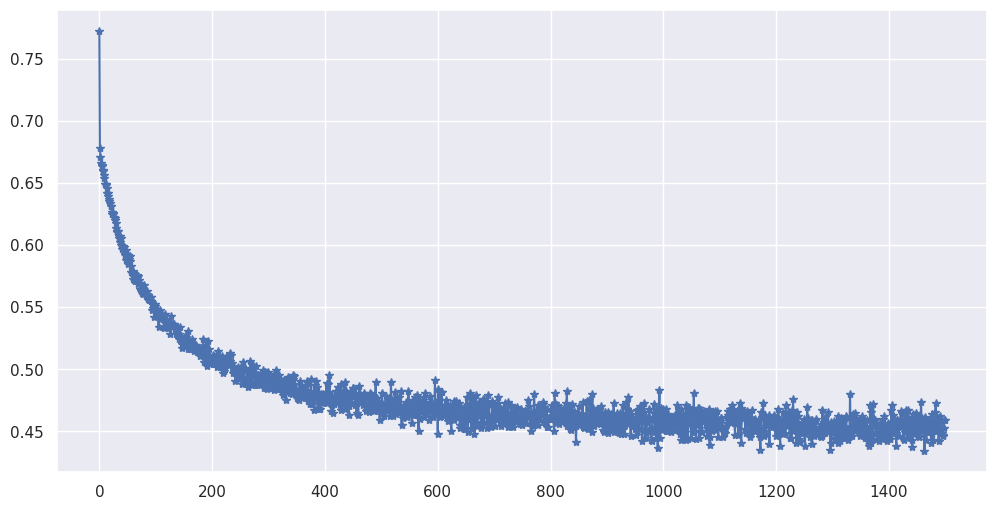

train Accuracy: 0.8040; test Accuracy: 0.8112
True Positives:3283	False Positives:730
False Negatives:1087	True Negatives:4523
Accuracy:0.8112
Recall:0.7513	Precision:0.8181
f1 measure:0.7833


In [ ]:
regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

Посмотрим веса

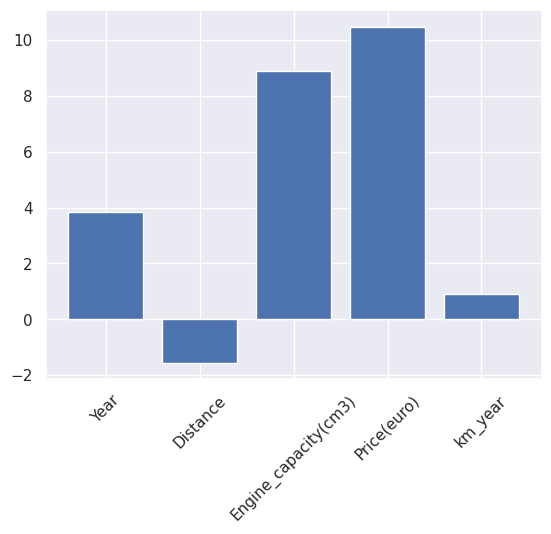

In [ ]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

Проведем тест с регуляризацией L2

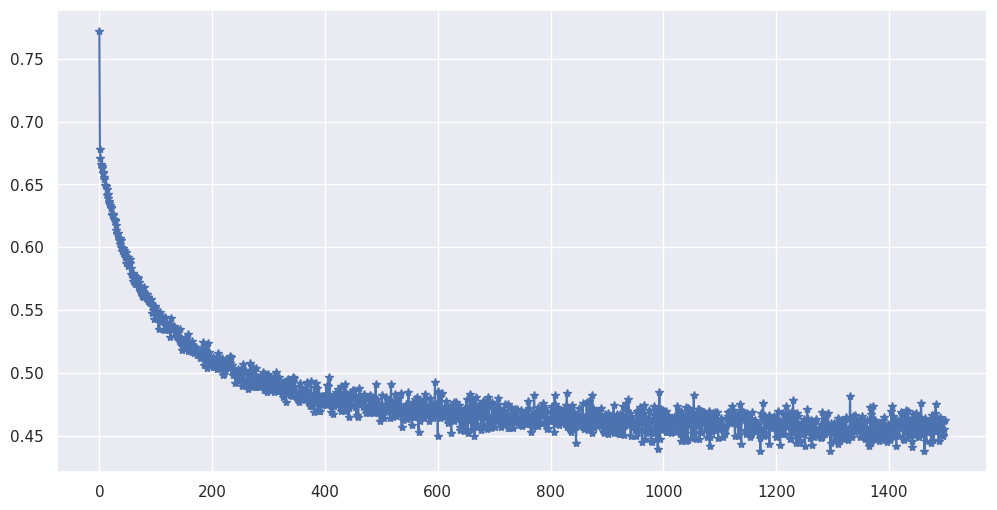

train Accuracy: 0.8034; test Accuracy: 0.8112
True Positives:3270	False Positives:717
False Negatives:1100	True Negatives:4536
Accuracy:0.8112
Recall:0.7483	Precision:0.8202
f1 measure:0.7826


In [ ]:
regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000, l2_penalty = 0.0001)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

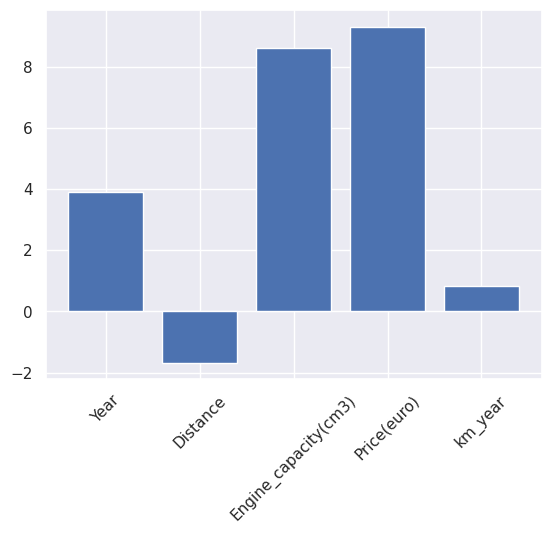

In [ ]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

Проведем тест с L1 регуляризацией

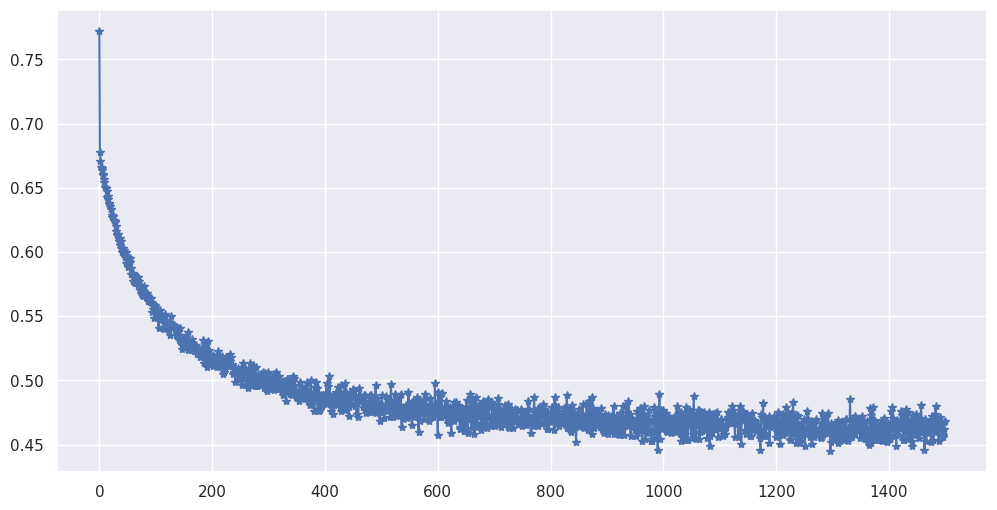

train Accuracy: 0.8003; test Accuracy: 0.8080
True Positives:3256	False Positives:734
False Negatives:1114	True Negatives:4519
Accuracy:0.8080
Recall:0.7451	Precision:0.8160
f1 measure:0.7789


In [ ]:
regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000, l1_penalty = 0.005)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

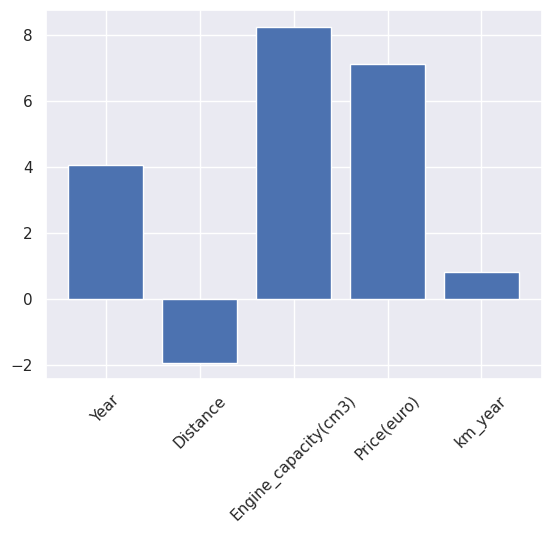

In [ ]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

Эластичная регрессия

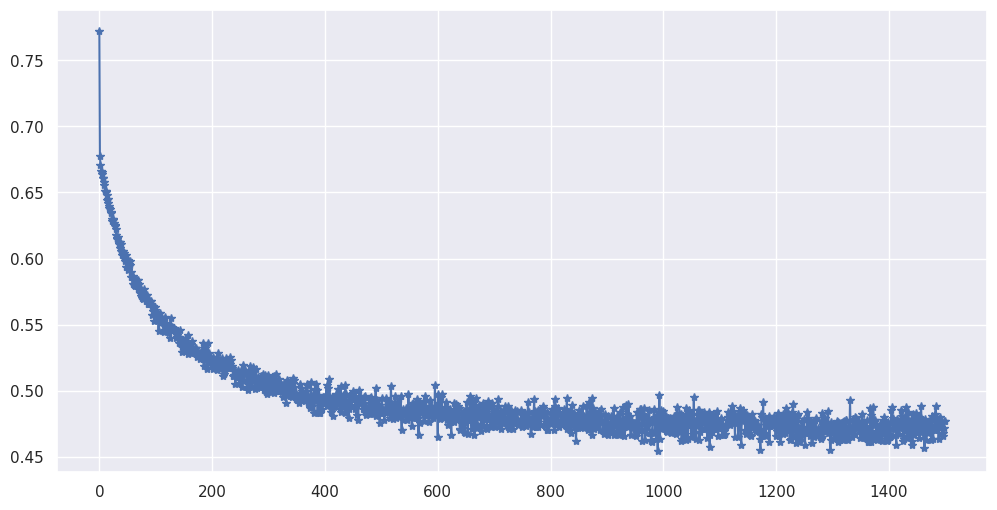

train Accuracy: 0.7950; test Accuracy: 0.8042
True Positives:3244	False Positives:758
False Negatives:1126	True Negatives:4495
Accuracy:0.8042
Recall:0.7423	Precision:0.8106
f1 measure:0.7750


In [ ]:
regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000, l1_penalty = 0.008, l2_penalty = 0.00005)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

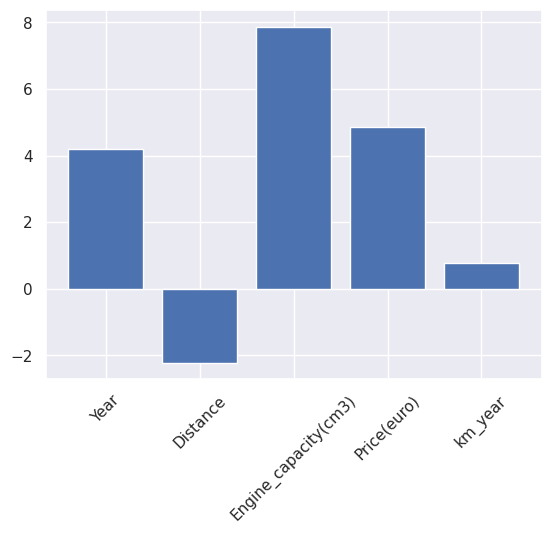

In [ ]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

Посмотрим, можно ли проводить классификацию без параметров связанных с расстоянием

In [ ]:
w, b = regr.get_w_and_b()

w[1] = 0
w[-1] = 0

regr = LogisticRegression(learning_rate=0.8,
                          epochs=1500,
                          batch_size=5000,
                          l1_penalty = 0.005,
                          weights = w,
                          bias = b)


print( 'train ACC: %.4f; test ACC: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

train ACC: 0.7526; test ACC: 0.7615
True Positives:3756	False Positives:1681
False Negatives:614	True Negatives:3572
Accuracy:0.7615
Recall:0.8595	Precision:0.6908
f1 measure:0.7660


# Практические задания

## 1. Сгенерируйте линейно разделимые данные с другими параметрами и проверьте модель логистической регрессии на этих данных. Проанализируйте метрики классификации

Генерация данных — с помощью функции make_classification создаются линейно разделимые данные.

Модель логистической регрессии — обучается на сгенерированных данных.

Оценка качества модели — с использованием отчета о классификации и ROC AUC метрики.

Визуализация — отображение сгенерированных данных на плоскости.

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       150
           1       0.98      0.97      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

ROC AUC Score: 0.9985333333333333


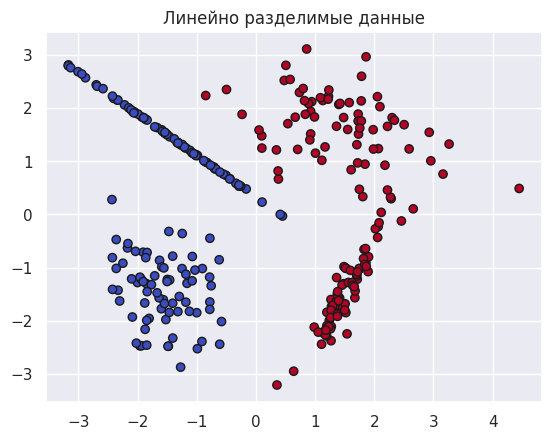

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Генерация линейно разделимых данных
X, y = make_classification(n_samples=300, n_features=2, n_informative=2,
                           n_redundant=0, class_sep=1.5, random_state=42)

# Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X, y)

# Предсказание на тех же данных
y_pred = model.predict(X)
y_proba = model.predict_proba(X)[:, 1]

# Оценка метрик
print("Classification Report:\n", classification_report(y, y_pred))
print("ROC AUC Score:", roc_auc_score(y, y_proba))

# Визуализация функции принятия решений
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title('Линейно разделимые данные')
plt.show()


## 2. Сгенерируйте данные, распределенные как знак инь-ян или концентрические круги. Проверьте различные степени полиномов исходных данных и различные типы регуляризации для достижения наилучшего качества классификации. Проанализируйте метрики классификации.

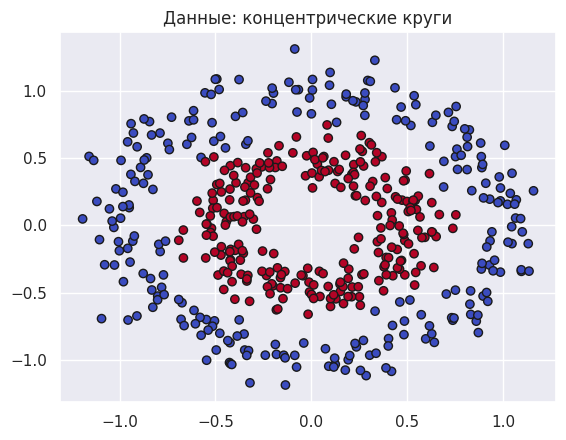

Polynomial Degree: 2
Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       250
           1       0.97      1.00      0.98       250

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500

ROC AUC Score: 0.999568
--------------------------------------------------
Polynomial Degree: 2
Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       250
           1       0.96      1.00      0.98       250

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500

ROC AUC Score: 0.999424
--------------------------------------------------
Polynomial Degree: 2
Model: ElasticNet
Classification Rep

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
from sklearn.datasets import make_circles
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, roc_auc_score

# Генерация данных, похожих на концентрические круги
X, y = make_circles(n_samples=500, factor=0.5, noise=0.1, random_state=42)

# Визуализация данных
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title('Данные: концентрические круги')
plt.show()

# Функция для оценки модели с различными степенями полиномов и регуляризацией
def evaluate_model(degree, model):
    poly_model = make_pipeline(PolynomialFeatures(degree), model)
    poly_model.fit(X, y)
    y_pred = poly_model.predict(X)

    # Преобразование непрерывных предсказаний в бинарные для регрессионных моделей
    if not isinstance(model, LogisticRegression):
        y_pred = (y_pred >= 0.5).astype(int)  # Порог для бинаризации предсказаний

    # Вычисление ROC AUC, если есть возможность
    if hasattr(poly_model, "predict_proba"):
        y_proba = poly_model.predict_proba(X)[:, 1]  # Только для классификации
        auc = roc_auc_score(y, y_proba)
    else:
        # Для регрессоров используем decision_function или predict как вероятности
        y_proba = poly_model.decision_function(X) if hasattr(poly_model, "decision_function") else poly_model.predict(X)
        auc = roc_auc_score(y, y_proba)

    print(f"Polynomial Degree: {degree}")
    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y, y_pred))
    print("ROC AUC Score:", auc)
    print("-" * 50)

# Проверка с различными степенями полиномов и типами регуляризации
degrees = [2, 3, 4]
models = [
    LogisticRegression(),
    RidgeClassifier(),  # Ridge классификатор
    ElasticNet()
]

for degree in degrees:
    for model in models:
        evaluate_model(degree, model)


## 3. Используйте модель логистической регрессии для предсказания типа трансмиссии автомобилей в наборе данных Cars. Для оценки качества модели используйте отложенную выборку и несколько метрик классификации. Сравните результаты модели при использовании только числовых признаков и при добавлении категориальных признаков с помощью One-Hotкодирования.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Загрузка данных
data = pd.read_csv('cars_moldova_cat_num.csv')

# Определение целевой переменной
y = data['Transmission']

# Числовые и категориальные признаки
numeric_features = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']
categorical_features = ['Make', 'Model', 'Style', 'Fuel_type']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Transmission']), y, test_size=0.3, random_state=42)

# Модель 1: Только числовые признаки
numeric_preprocessor = StandardScaler()

model_numeric = Pipeline(steps=[
    ('preprocessor', numeric_preprocessor),
    ('classifier', LogisticRegression())
])

# Обучение модели с числовыми признаками
model_numeric.fit(X_train[numeric_features], y_train)

# Предсказание на тестовой выборке
y_pred_numeric = model_numeric.predict(X_test[numeric_features])

# Оценка модели с числовыми признаками
print("Результаты модели на числовых признаках:")
print(classification_report(y_test, y_pred_numeric))
print("Accuracy:", accuracy_score(y_test, y_pred_numeric))

# Модель 2: Числовые и категориальные признаки с One-Hot-кодированием
preprocessor_full = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

model_full = Pipeline(steps=[
    ('preprocessor', preprocessor_full),
    ('classifier', LogisticRegression())
])

# Обучение модели с числовыми и категориальными признаками
model_full.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_full = model_full.predict(X_test)

# Оценка модели с числовыми и категориальными признаками
print("\nРезультаты модели с числовыми и категориальными признаками:")
print(classification_report(y_test, y_pred_full))
print("Accuracy:", accuracy_score(y_test, y_pred_full))


Результаты модели на числовых признаках:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      5253
           1       0.83      0.75      0.79      4370

    accuracy                           0.82      9623
   macro avg       0.82      0.81      0.81      9623
weighted avg       0.82      0.82      0.82      9623

Accuracy: 0.816169593681804

Результаты модели с числовыми и категориальными признаками:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      5253
           1       0.87      0.81      0.84      4370

    accuracy                           0.86      9623
   macro avg       0.86      0.85      0.85      9623
weighted avg       0.86      0.86      0.86      9623

Accuracy: 0.857217084069417


## 4*. Сравните работу реализованных алгоритмов с функцией библиотеки scikit-learn — логистической регрессией sklearn.linear_model.LogisticRegression.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Загрузка данных
data = pd.read_csv('cars_moldova_cat_num.csv')

# Определение целевой переменной и признаков
y = data['Transmission']
numeric_features = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']
categorical_features = ['Make', 'Model', 'Style', 'Fuel_type']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Transmission']), y, test_size=0.3, random_state=42)

# Только числовые признаки
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train[numeric_features])
X_test_numeric = scaler.transform(X_test[numeric_features])

# Модель 1: Логистическая регрессия только на числовых признаках
log_reg_numeric = LogisticRegression(max_iter=1000)
log_reg_numeric.fit(X_train_numeric, y_train)
y_pred_numeric = log_reg_numeric.predict(X_test_numeric)

print("Результаты модели на числовых признаках:")
print(classification_report(y_test, y_pred_numeric, target_names=['Механика', 'Автомат']))
print("Точность (Accuracy):", accuracy_score(y_test, y_pred_numeric))

# Числовые + категориальные признаки
encoder = OneHotEncoder()
X_train_cat = encoder.fit_transform(X_train[categorical_features]).toarray()
X_test_cat = encoder.transform(X_test[categorical_features]).toarray()

# Объединение числовых и категориальных признаков
X_train_full = np.hstack([X_train_numeric, X_train_cat])
X_test_full = np.hstack([X_test_numeric, X_test_cat])

# Модель 2: Логистическая регрессия на числовых и категориальных признаках
log_reg_full = LogisticRegression(max_iter=1000)
log_reg_full.fit(X_train_full, y_train)
y_pred_full = log_reg_full.predict(X_test_full)

print("\nРезультаты модели на числовых и категориальных признаках:")
print(classification_report(y_test, y_pred_full, target_names=['Механика', 'Автомат']))
print("Точность (Accuracy):", accuracy_score(y_test, y_pred_full))


Результаты модели на числовых признаках:
              precision    recall  f1-score   support

    Механика       0.81      0.87      0.84      5253
     Автомат       0.83      0.75      0.79      4370

    accuracy                           0.82      9623
   macro avg       0.82      0.81      0.81      9623
weighted avg       0.82      0.82      0.82      9623

Точность (Accuracy): 0.816169593681804

Результаты модели на числовых и категориальных признаках:
              precision    recall  f1-score   support

    Механика       0.85      0.90      0.87      5253
     Автомат       0.87      0.81      0.84      4370

    accuracy                           0.86      9623
   macro avg       0.86      0.85      0.85      9623
weighted avg       0.86      0.86      0.86      9623

Точность (Accuracy): 0.857217084069417


# МНЕ ПОМОЩЬ

Оба кода решают одну и ту же задачу — предсказывают тип трансмиссии (механика или автомат) на основе числовых и категориальных признаков с использованием логистической регрессии. Основное различие между ними заключается в способе обработки данных и организации кода. Вот ключевые различия:

1. Использование Pipeline и ColumnTransformer (Первый код)
Первый код использует объекты Pipeline и ColumnTransformer, что делает процесс подготовки данных и обучения модели более компактным и инкапсулированным.

Pipeline: Это объект, который позволяет объединить несколько шагов в одну цепочку (например, сначала масштабирование данных, затем обучение модели). Это удобно, так как позволяет автоматизировать весь процесс.

ColumnTransformer: Этот объект используется для одновременной обработки разных типов данных (например, числовых и категориальных признаков) в одном пайплайне. В данном случае числовые признаки масштабируются, а категориальные кодируются с помощью One-Hot-кодирования.

Преимущества:

Код становится более структурированным и удобным для повторного использования.
Все шаги (предобработка данных и обучение модели) объединены в одну цепочку, что упрощает процесс.
Недостатки:

Может показаться сложнее для понимания тем, кто только начинает работать с моделями машинного обучения.
2. Ручная обработка данных (Второй код)
Во втором коде вся обработка данных выполняется вручную без использования Pipeline и ColumnTransformer.

Ручное масштабирование и One-Hot-кодирование: Масштабирование числовых признаков выполняется с помощью StandardScaler, а категориальные признаки кодируются с помощью OneHotEncoder. Это делает код более прозрачным для понимания, но он становится менее инкапсулированным.

Использование np.hstack: Для объединения числовых и категориальных признаков используется функция np.hstack(). Это необходимо, так как признаки обрабатываются отдельно, и их нужно объединить перед подачей на вход модели.

Преимущества:

Код может показаться более понятным для тех, кто только начинает изучать машинное обучение.
Даёт больше контроля над процессом обработки данных и позволяет лучше понять, что происходит на каждом этапе.
Недостатки:

Код становится менее структурированным и менее удобным для масштабирования (например, если добавятся новые этапы предобработки данных).
Сравнение по ключевым аспектам:
Аспект	Первый код (Pipeline)	Второй код (ручная обработка)
Предобработка данных	Использует Pipeline и ColumnTransformer	Выполняется вручную
Масштабирование и кодирование	Инкапсулировано в Pipeline	Выполняется вручную через StandardScaler и OneHotEncoder
Удобство	Более структурированный и автоматизированный процесс	Более простой для понимания, но требует ручных шагов
Гибкость	Легче добавлять и модифицировать шаги	Требует изменений в нескольких частях кода
Чистота кода	Более компактный и повторно используемый	Более явный и контролируемый процесс
Вывод:
Первый код лучше подходит для более сложных и масштабируемых проектов, где важна структурированность и гибкость.
Второй код подходит для более простых задач или для начального уровня, когда важно понять каждый шаг обработки данных и обучения модели.

Да, во втором коде используется функция логистической регрессии из библиотеки scikit-learn — sklearn.linear_model.LogisticRegression. Таким образом, оба кода фактически используют одну и ту же модель логистической регрессии для сравнения, что и требовалось по заданию.

В обоих кодах логистическая регрессия вызывается с помощью:

python
Копировать код
from sklearn.linear_model import LogisticRegression
И затем модель обучается:

python
Копировать код
log_reg_numeric = LogisticRegression(max_iter=1000)
log_reg_numeric.fit(X_train_numeric, y_train)
Во втором коде, как и в первом, происходит сравнение работы логистической регрессии на:

Только числовых признаках.
Числовых и категориальных признаках (с использованием One-Hot-кодирования).
Таким образом, оба кода корректно сравнивают работу модели логистической регрессии LogisticRegression на разных наборах данных, и во втором коде это сравнение также полностью соответствует использованию функции библиотеки scikit-learn.

# Контрольные вопросы

## 1. Допустим, тест на некое заболевание R дал положительный ответ, хотя на самом деле у испытуемого нет этого заболевания. Какую ошибку допустил тест?

Ответ:

Тест допустил ошибку **I рода**. Это означает, что тест ошибочно определил наличие заболевания, когда его на самом деле нет.

## 2. Пусть в матрице ошибок TP = 5, TN = 90, FP = 10, FN = 5. Оцените метрики классификации для такой матрицы ошибок

Ответ:

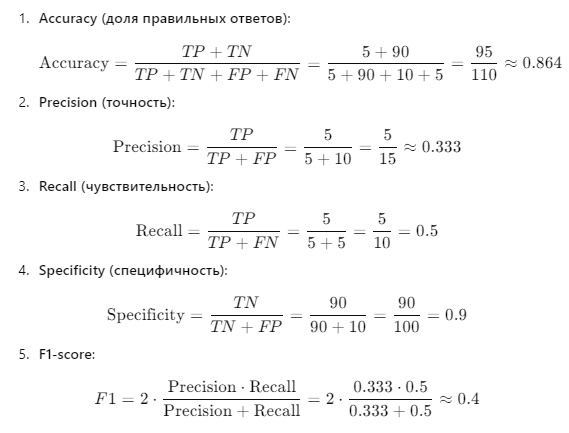

## 3. Допустим, есть два классификатора: первый классификатор имеет долю правильных ответов 95 %, чувствительность 99 %, специфичность 50 %; второй классификатор имеет долю правильных ответов 87 %, чувствительность 84 %, специфичность 94 %. Что вы можете сказать о данных, используемых для классификации? Какой из этих классификаторов надежнее (при условии, что важно определение обоих классов)?

Ответ:

**Первый классификатор** имеет высокую чувствительность (99%), но низкую специфичность (50%), что говорит о том, что он хорошо определяет положительный класс (очень мало ложных отрицательных), но часто ошибается с отрицательным классом (много ложноположительных).

**Второй классификатор** имеет более сбалансированные показатели: чувствительность — 84%, специфичность — 94%, что означает, что он лучше разделяет оба класса.

Итог:

 Если важно правильно классифицировать оба класса, второй классификатор выглядит более надежным, так как он лучше сбалансирован по чувствительности и специфичности, несмотря на более низкую общую точность.

## 4. Перечислите возможные гиперпараметры модели логистической регрессии.

Ответ:

**penalty:** тип регуляризации — ограничение, которое помогает избежать переобучения модели. Возможные варианты:

**l1:** L1-регуляризация (снижает веса ненужных признаков до 0, т.е. осуществляет отбор признаков),

**l2:** L2-регуляризация (уменьшает все веса, но не обнуляет их),

**elasticnet:** комбинация L1 и L2 регуляризаций,

**none:** без регуляризации.

**C:** коэффициент, обратный силе регуляризации. Чем меньше значение этого параметра, тем сильнее регуляризация (то есть модель будет больше ограничена).

**solver:** метод оптимизации, используемый для нахождения оптимальных параметров модели. Возможные варианты:

**1) lbfgs:** быстрый метод для небольших и средних задач,

**2) liblinear:** подходит для небольших наборов данных и поддерживает только l1 и l2 регуляризацию,

**3) sag** и **saga:** методы для больших наборов данных, работающие быстрее за счет стохастического подхода.

**max_iter:** максимальное количество итераций, которое будет выполнено для того, чтобы модель сошлась (т.е. нашла лучшие коэффициенты).

**tol:** порог терпимости для остановки алгоритма. Если изменения становятся меньше этого значения, алгоритм остановится.

**fit_intercept:** добавлять ли смещение (константу) в модель. Если True, модель будет добавлять постоянную (интерсепт) к предсказанию.

## 5. Для набора данных cars_moldova_cat_num проанализируйте веса моделей при использовании только числовых признаков. Назовите параметр, который в наибольшей степени связан с целевой переменной.

Ответ:

Make — марка автомобиля (категориальный признак)

Model — модель автомобиля (категориальный признак)

Year — год выпуска (числовой признак)

Style — тип кузова (категориальный признак)

Distance — пробег автомобиля (числовой признак)

Engine_capacity(cm3) — объем двигателя в кубических сантиметрах (числовой признак)

Fuel_type — тип топлива (категориальный признак)

Transmission — тип трансмиссии (целевая переменная)

Price(euro) — цена автомобиля в евро (числовой признак)

km_year — средний пробег в год (числовой признак)

Целевая переменная (или метка) — это та переменная, которую модель пытается предсказать. В задаче классификации целевая переменная — это класс или категория, которую мы хотим предсказать на основе данных.

Пример для cars_moldova_cat_num:
В этом наборе данных есть множество признаков (фичей), которые описывают автомобили, такие как год выпуска, объем двигателя, пробег и так далее. Однако цель — предсказать один конкретный признак, и этот признак будет целевой переменной.

Для данных cars_moldova_cat_num целевой переменной является Transmission — тип трансмиссии автомобиля (например, "механика" или "автомат"). Это тот параметр, который мы хотим предсказать, используя другие признаки.

Для этого анализа необходимо обучить модель логистической регрессии и проанализировать веса (коэффициенты) модели. Признак с наибольшим по модулю весом будет наибольшей степени связан с целевой переменной.

In [ ]:
model = LogisticRegression()
model.fit(X_train_numeric, y_train)
print(model.coef_)

[[ 0.75539763  0.23528646  1.01207999  1.97285683 -0.36882747]]


## 6. Оцените значение функции сигмоиды σ(z) для z = 0.25

Ответ:

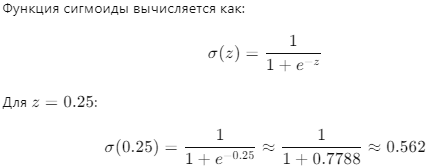

## 7. Оцените значение производной функции сигмоиды σ'(z) для z = –3.

Ответ:

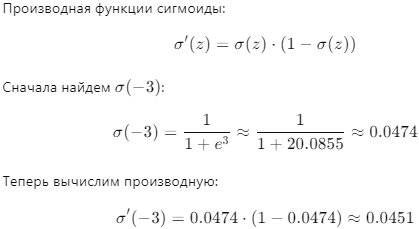

## 8. Назовите, к какому классу следует отнести результат логистической модели для z = 0.1, если порог равен 0.6.

Ответ:

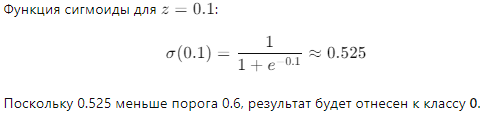

## 9. Оцените значение функции потерь (бинарной кросс-энтропии) для предсказания модели image.png = 0.1 и целевой переменной y = 1.

Ответ:

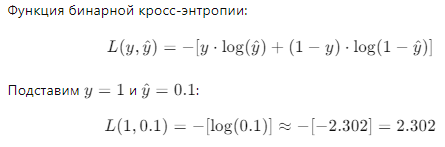